# Exact (approximately) $C_e(t)$ function, with variable $k_e$, followed by the exact version of $E(C_e(t))$ for varying $k_e$, $EC_{50}$, and $n$.

In [1]:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)

In [2]:
from sympy import Symbol, Function, Piecewise
>>> from sympy.calculus.euler import euler_equations
>>> x = Function('x')
>>> t = Symbol('t')
>>> u = Function('u')
>>> x = Symbol('x')

In [3]:
k, q, ce0 = symbols('k q ce0')
cp1=Function('cp1')  # Conc. plasma early
ce1=Function('ce1')  # Conc. effect compartment early
cp2=Function('cp2')  # late
ce2=Function('ce2')  # late
cpeak=Symbol('cpeak')
ce1peak=Symbol('ce1peak')

In [4]:
# Assumes the following constants:
a0 = 55.4  #  Actually, use the symbol "ce0" rather than assuming a specific value for a0.
a1 = 286.69070707
a2 = 5.86707071
tload = 10
Cinf = 577.144039
B = 949.610835
alpha = 0.349642935
beta = 4.50951082e-02
import math
ln2 = math.log(2)
ln2

0.6931471805599453

In [5]:
cp1=ce0+a1*t-a2*t**2
cp1

ce0 - 5.86707071*t**2 + 286.69070707*t

In [6]:
cp1.subs(t,tload)

ce0 + 2280.1999997

In [7]:
cpeak=_
cpeak

ce0 + 2280.1999997

In [8]:
ce1 = a0-a1/k-2*a2/k**2+(a1+2*a2/k)*t-a2*t**2+(ce0-a0+a1/k+2*a2/k**2)*exp(-k*t)
ce1

-5.86707071*t**2 + t*(286.69070707 + 11.73414142/k) + (ce0 - 55.4 + 286.69070707/k + 11.73414142/k**2)*exp(-k*t) + 55.4 - 286.69070707/k - 11.73414142/k**2

```
In [11]:  ce1.subs(ce0,55.4)
Out[11]:  -5.86707071*t**2 + t*(286.69070707 + 11.73414142/k) + (286.69070707/k + 11.73414142/k**2)*exp(-k*t) + 55.4 - 286.69070707/k - 11.73414142/k**2
```

```
ce1.subs([(ce0,55.4), (t,tload)])
```

### Aargh. I shouldn't have done that maybe. Oh well, for now I'll just leave ce0=55.4. 

I can go back later and re-do the lines below (solving for ce2) with ce0 left as a symbol. ...

Oh, whatever, let's re-do it.

In [9]:
print(ce1)
ce1.subs(t,0)

-5.86707071*t**2 + t*(286.69070707 + 11.73414142/k) + (ce0 - 55.4 + 286.69070707/k + 11.73414142/k**2)*exp(-k*t) + 55.4 - 286.69070707/k - 11.73414142/k**2


ce0

### OK, the problem (below) is that I am assuming that ce0 = a0 *i.e.* the baseline $C_p(0)$.
If I assume that, then keeping a 55.4 in for a0 seems odd--seems like it should be left as a0=ce0. 

In [10]:
ce1.subs(t,tload)

(ce0 - 55.4 + 286.69070707/k + 11.73414142/k**2)*exp(-10*k) + 2335.5999997 - 169.34929287/k - 11.73414142/k**2

In [11]:
ce1peak=_
ce1peak

(ce0 - 55.4 + 286.69070707/k + 11.73414142/k**2)*exp(-10*k) + 2335.5999997 - 169.34929287/k - 11.73414142/k**2

In [12]:
cp2=B*exp(-beta*(t-tload))+(cpeak-Cinf-B)*exp(-alpha*(t-tload))+Cinf
cp2

32.9974191225346*(ce0 + 753.445125699999)*exp(-0.349642935*t) + 577.144039 + 1490.70335112923*exp(-0.0450951082*t)

In [13]:
simplify(cp1.subs(t,10.0)-cp2.subs(t,10.0))

1.11022302462516e-16*ce0 + 4.54747350886464e-13

That means cp1(tload) == cp2(tload). Good.

In [14]:
dsolve(Eq(z(t).diff(t), k*(cp2-z(t))), z(t))

Eq(z(t), (C1 + Piecewise((-4.88600493816247*ce0*exp(-0.3045478268*t) + 6.05494818808789e+17*exp(1.11022302462516e-16*t) + 577.144039*exp(0.0450951082000001*t) - 3681.33660480464*exp(-0.3045478268*t), Eq(k, 0.0450951082000001)), (-1.03918890290745e+17*ce0*exp(-1.11022302462516e-16*t) + 1711.43527891745*exp(0.3045478268*t) + 577.144039*exp(0.349642935*t) - 7.8297181357715e+19*exp(-1.11022302462516e-16*t), Eq(k, 0.349642935000000)), (32.9974191225346*ce0*k**2*exp(0.0450951082*t)*exp(k*t)/(1.0*k**2*exp(0.3947380432*t) - 0.3947380432*k*exp(0.3947380432*t) + 0.0157671859851906*exp(0.3947380432*t)) - 1.48802218565144*ce0*k*exp(0.0450951082*t)*exp(k*t)/(1.0*k**2*exp(0.3947380432*t) - 0.3947380432*k*exp(0.3947380432*t) + 0.0157671859851906*exp(0.3947380432*t)) + 24861.7445985536*k**2*exp(0.0450951082*t)*exp(k*t)/(1.0*k**2*exp(0.3947380432*t) - 0.3947380432*k*exp(0.3947380432*t) + 0.0157671859851906*exp(0.3947380432*t)) + 1490.70335112923*k**2*exp(0.349642935*t)*exp(k*t)/(1.0*k**2*exp(0.39473804

OK. z(t) is the solution for ce2(t). The Out line above means:

if k=0, `z(t)=(q)`  *(and besides, k==0 does imply Ce is constant--in this case, q=ce0)*

otherwise, ```z(t)=(q + 577.144039*k*exp(k*t)/k)*exp(-k*t)
               = (q + 577.144039*exp(k*t))*exp(-k*t)
               = q*exp(-k*t) + 577.144039```

In [15]:
ce1peak

(ce0 - 55.4 + 286.69070707/k + 11.73414142/k**2)*exp(-10*k) + 2335.5999997 - 169.34929287/k - 11.73414142/k**2

In [16]:
print(ce1peak.subs(k,ln2/22))
print(ce1peak.subs(k,ln2/40))

0.729740052840723*ce0 + 365.632590766798
0.840896415253715*ce0 + 210.994665227248


In [17]:
solve(Eq(q*exp(-k*tload) + 577.144039,ce1peak),q)

[1.0e-8*(10.0*k**2*(10000000.0*ce0 + 17584559607.0*exp(10.0*k) - 554000000.0) + k*(-16934929287.0*exp(10.0*k) + 28669070707.0) - 1173414142.0*exp(10.0*k) + 1173414142.0)/k**2]

Let's call that ugly constant of integration (with k left as a symbol) ce2c.

In [18]:
ce2c = Symbol('ce2c')
ce2c=1.0e-8*(10.0*k**2*(10000000.0*ce0 + 17584559607.0*exp(10.0*k) - 554000000.0) \
        + k*(-16934929287.0*exp(10.0*k) + 28669070707.0) - 1173414142.0*exp(10.0*k) + 1173414142.0)/k**2

In [19]:
ce2=ce2c*exp(-k*t)+577.144039
ce2

577.144039 + (1.0e-7*k**2*(10000000.0*ce0 + 17584559607.0*exp(10.0*k) - 554000000.0) + 1.0e-8*k*(-16934929287.0*exp(10.0*k) + 28669070707.0) - 11.73414142*exp(10.0*k) + 11.73414142)*exp(-k*t)/k**2

In [20]:
print(ce2.subs(k,ln2/22).subs(t,tload))
print(ce2.subs(k,ln2/40).subs(t,tload))

0.729740052840723*ce0 + 365.6325907668
0.840896415253715*ce0 + 210.994665227261


Yup. That appears to be working. Cool.

In [21]:
ce2

577.144039 + (1.0e-7*k**2*(10000000.0*ce0 + 17584559607.0*exp(10.0*k) - 554000000.0) + 1.0e-8*k*(-16934929287.0*exp(10.0*k) + 28669070707.0) - 11.73414142*exp(10.0*k) + 11.73414142)*exp(-k*t)/k**2

In [22]:
simplify(ce2)

(k**2*(1.0*ce0 + 1758.4559607*exp(10.0*k) - 55.4) + 577.144039*k**2*exp(k*t) - 1.0e-8*k*(16934929287.0*exp(10.0*k) - 28669070707.0) - 11.73414142*exp(10.0*k) + 11.73414142)*exp(-k*t)/k**2

In [23]:
simplify(1.0e-8*16934929287.0)

169.349292870000

In [24]:
simplify(1.0e-8*28669070707.0)

286.690707070000

### This was the old way, with 55.4 substituted for ce0:
```
(1758.4559607*k**2*exp(10.0*k) + 577.144039*k**2*exp(k*t) - 1.0e-8*k*(16934929287.0*exp(10.0*k) \
        - 28669070707.0) - 11.73414142*exp(10.0*k) + 11.73414142)*exp(-k*t)/k**2
=1758.4559607*k**2*exp(10*k)*exp(-k*t)/k**2 + 577.144039*k**2*exp(k*t)*exp(-k*t)/k**2 \
    - 1.0e-8*k*(16934929287.0*exp(10.0*k)*exp(-k*t)/k**2 - 1.0e-8*k*(-28669070707.0)*exp(-k*t)/k**2 \
    - 11.73414142*exp(10.0*k)*exp(-k*t)/k**2 + 11.73414142*exp(-k*t)/k**2
= 1758.4559607*exp(-k*(t-10)) + 577.144039 - 169.349292870*exp(-k*(t-10))/k + 286.690707070*exp(-k*t)/k \
    - 11.73414142*exp(-k*(t-10))/k**2 + 11.73414142*exp(-k*t)/k**2
= 1758.4559607*exp(-k*(t-10)) + 577.144039 - 169.349292870*exp(-k*(t-10))/k + 286.690707070*exp(-k*t)/k \
    + 11.73414142*(exp(-k*t)-exp(-k*(t-10)))/k**2
= 577.144039 + exp(-k*(t-10))*(1758.4559607-169.349292870/k-11.73414142/k**2) \
    + exp(-k*t)*(286.690707070/k + 11.73414142/k**2)
```

### Here's the new way, leaving ce0 as a symbol:
```
(k**2*(1.0*ce0 + 1758.4559607*exp(10*k) - 55.4) + 577.144039*k**2*exp(k*t) \
     - 1.0e-8*k*(16934929287.0*exp(10*k) - 28669070707.0) - 11.73414142*exp(10*k)\
     + 11.73414142)*exp(-k*t)/k**2
= (ce0 + 1758.4559607*exp(10*k) - 55.4)*exp(-k*t) + 577.144039 \
    - 169.349292870*exp(10*k)*exp(-k*t)/k + 286.690707070*exp(-k*t)/k \
    - 11.73414142*exp(10*k)*exp(-k*t)/k**2 + 11.73414142*exp(-k*t)/k**2 \
= 577.144039 + exp(-k*t)*()
```
. . .

### OK, wait. See above re a0 (=Cp(0)) =? ce0. Just keep the assumption of a0=ce0=55.4 for now.

In [25]:
simplify(ce2 - ( 577.144039 + exp(-k*(t-10))*(1758.4559607-169.349292870/k-11.73414142/k**2) \
    + exp(-k*t)*(286.690707070000/k + 11.73414142/k**2) ) )

(1.0*ce0*k - 2.27373675443232e-13*k*exp(10*k) - 55.4*k + 5.6843418860808e-14)*exp(-k*t)/k

In [26]:
_.subs(ce0,55.4)

(-2.27373675443232e-13*k*exp(10*k) + 5.6843418860808e-14)*exp(-k*t)/k

In [27]:
_.subs(k,ln2/22).subs(t,10)

1.08920129481305e-12

### I think we're going to have to call that close enough to equality.

In [28]:
from sympy import Piecewise
ce2 = Piecewise( (ce0, k==0), \
                (577.144039 + exp(-k*(t-10))*(1758.4559607-169.349292870/k-11.73414142/k**2) \
                            + exp(-k*t)*(286.690707070000/k + 11.73414142/k**2) , True)  ) 

In [29]:
ce2.subs(k,0)

nan

In [30]:
(a0)

55.4

In [31]:
def Ce(time, ke):    # , ce0=55.4
    """Ce(t), (approximately) exact solution for concentration of LD in the effect compartment.
    
    # keyword argument: ce0 -- concentration in effect compartment at time t=0, Ce(0).
    t is a numpy array of time points
    k is the rate constant ke, a.k.a. ke0.  Units: t min, Ce(t) ng/ml, k 1/min.
    Assumes the Cp(t) modeled in hysteresis_5.ipynb based on Fig. 3 from Black et al 2003. 
    Ce(0)=the baseline Cp in the "practical off" state for 10 LD-treated PD patients in (ibid.).
    """
    import numpy as np  # for np.exp(x)
    # The next couple of lines could be dealt with more gracefully, I suppose.
    assert ke != alpha, "If k==alpha, Ce(t) may need a modified form."
    assert ke != beta,  "If k==beta,  Ce(t) may need a modified form."
    if float(ke)==0.0:  # If k is zero, Ce(t)==Ce(0) for all t>=0.
        return np.full(time.shape,a0,dtype=float)
    # See hysteresis_6.ipynb and above for floats below.
    ce1constant = 55.4 - 286.69070707/ke - 11.73414142/ke**2  # for convenience in ce1(t) below
    return np.where(time<0.0,np.full(time.shape,a0),\
        np.where(time<=tload, (a0 - ce1constant)*np.exp(-ke*time) \
            -5.86707071*time**2 + (286.69070707 + 11.73414142/ke)*time + ce1constant , \
        577.144039 + np.exp(-ke*(time-10))*(1758.4559607-169.349292870/ke-11.73414142/ke**2) \
            + np.exp(-ke*time)*(286.690707070000/ke + 11.73414142/ke**2)) )

In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [34]:
def test2(t, ke=ln2/22):
    ce1constant = 55.4 - 286.69070707/ke - 11.73414142/ke**2
    return (55.4 - ce1constant)*np.exp(-ke*t) -5.86707071*t**2 + (286.69070707 + 11.73414142/ke)*t + ce1constant
print (test2(0), test2(1), test2(2), test2(5), test2(10))

55.4 59.8081422365 72.6065306292 155.197682204 406.060189694


In [35]:
earlies=np.arange(0,10.1,.25)
earlies

array([  0.  ,   0.25,   0.5 ,   0.75,   1.  ,   1.25,   1.5 ,   1.75,
         2.  ,   2.25,   2.5 ,   2.75,   3.  ,   3.25,   3.5 ,   3.75,
         4.  ,   4.25,   4.5 ,   4.75,   5.  ,   5.25,   5.5 ,   5.75,
         6.  ,   6.25,   6.5 ,   6.75,   7.  ,   7.25,   7.5 ,   7.75,
         8.  ,   8.25,   8.5 ,   8.75,   9.  ,   9.25,   9.5 ,   9.75,  10.  ])

In [36]:
test2(earlies)

array([  55.4       ,   55.68057056,   56.5155068 ,   57.89470538,
         59.80814224,   62.24587193,   65.19802708,   68.6548177 ,
         72.60653063,   77.0435289 ,   81.95625115,   87.33521106,
         93.17099671,   99.45427004,  106.17576624,  113.3262932 ,
        120.89673092,  128.87803098,  137.2612159 ,  146.03737869,
        155.1976822 ,  164.73335865,  174.63570901,  184.89610253,
        195.50597616,  206.45683405,  217.74024699,  229.3478519 ,
        241.27135134,  253.50251294,  266.03316892,  278.85521562,
        291.96061292,  305.34138378,  318.98961378,  332.89745057,
        347.0571034 ,  361.46084266,  376.10099938,  390.96996476,
        406.06018969])

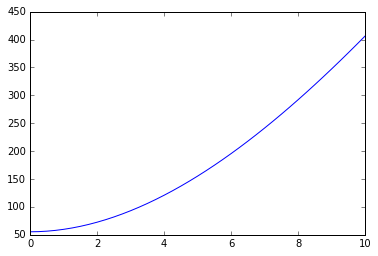

In [37]:
%matplotlib inline
fig = plt.plot(earlies,test2(earlies))

In [38]:
Ce(earlies, ln2/22)

array([  55.4       ,   55.68057056,   56.5155068 ,   57.89470538,
         59.80814224,   62.24587193,   65.19802708,   68.6548177 ,
         72.60653063,   77.0435289 ,   81.95625115,   87.33521106,
         93.17099671,   99.45427004,  106.17576624,  113.3262932 ,
        120.89673092,  128.87803098,  137.2612159 ,  146.03737869,
        155.1976822 ,  164.73335865,  174.63570901,  184.89610253,
        195.50597616,  206.45683405,  217.74024699,  229.3478519 ,
        241.27135134,  253.50251294,  266.03316892,  278.85521562,
        291.96061292,  305.34138378,  318.98961378,  332.89745057,
        347.0571034 ,  361.46084266,  376.10099938,  390.96996476,
        406.06018969])

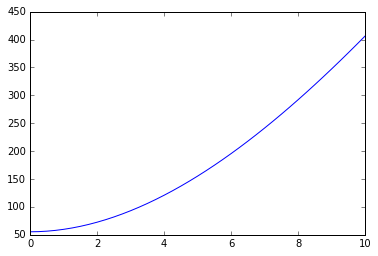

In [39]:
fig=plt.plot(earlies,Ce(earlies,ln2/22))

In [40]:
times=np.arange(0,180.1,.25)

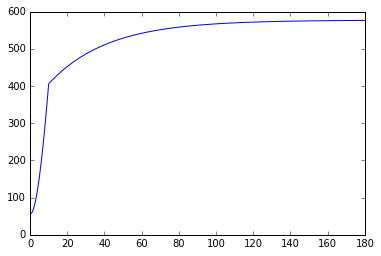

In [41]:
fig = plt.plot(times,Ce(times,ln2/22))

In [42]:
simplify(32.9974191225346*(55.4 + 753.445125699999)*exp(-0.349642935*t) \
                    + 1490.70335112923*exp(-0.0450951082*t) + 577.144039)

577.144039 + 26689.8016179421*exp(-0.349642935*t) + 1490.70335112923*exp(-0.0450951082*t)

In [43]:
def Cp(time):  
    """Cp(t), empirically defined to approximate Fig. 3 in Black et al 2003 (t in min, Cp in ng/ml).

    Keyword arguments:
    tload  -- end of loading dose, in minutes
    Cinf -- the target steady-state Cp(infinity)  (0 if no maintenance infusion)
    Cp_a0, Cp_a1, Cp_a2 -- coefficients in Cp(t) = ga0 + a1*t - a2*t^2 for t<tload. NOTE minus sign.
    alpha, beta -- coefficients of the biexponential describing Cp(t) for t>=tload. Assume alpha>beta.
    bigb -- is roughly the magnitude of the elimination phase of the biexponential (alpha for distribution)
    Compare Fig. 3 in Black et al 2003 and effect_compartment_modeling_20141025.xlsx
    See also hysteresis_plotting_3.ipynb and _4.ipynb.
    """
    import numpy as np  # for exp(x)
    return np.where(time<=tload, 55.4 - 5.86707071*time**2 + 286.69070707*time, \
      26689.8016179421*np.exp(-0.349642935*time) + 1490.70335112923*np.exp(-0.0450951082*time) + 577.144039)

$t_{\frac{1}{2}e}$, $t_{1/2 e}$, $t_{\textonehalf{}e}$, $t_{\nicefrac{1}{2} e}$

concs_thalf_133


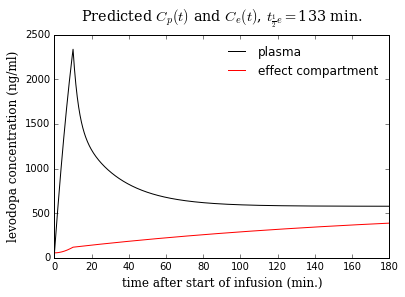

In [44]:
thalfe=133
ke = ln2/thalfe
titlestring='concs_thalf_'+'{:.0f}'.format(thalfe)
print(titlestring)
fig = plt.plot(times,Cp(times),'black')
plt.plot(times,Ce(times,ke),'red')
plt.xlabel('time after start of infusion (min.)',family='serif', size='large')
plt.ylabel('levodopa concentration (ng/ml)',family='serif', size='large')
plt.title('Predicted $C_p(t)$ and $C_e(t)$, $t_{\\frac{1}{2}e} = $'+'{:.0f}'.format(thalfe)+' min.',\
          family='serif', size='x-large', verticalalignment='bottom')
plt.legend(['plasma','effect compartment'], loc='best', framealpha=0) 
plt.savefig(titlestring+'.png', dpi=600, transparent=True) 
plt.savefig(titlestring+'.tiff', dpi=1200, transparent=True) 

In [45]:
pwd

'C:\\Users\\kevin\\Documents\\Jupyter_nbs\\hysteresis'

The values for $t_{\frac{1}{2}eq}$ in the following plot are from Contin: best, H&Y1, H&Y2, H&Y3, H&Y4, worst.

In [46]:
thalfes = [277,133,78,28,20,5]
thalfes.reverse()
titlestring='concs_thalf_several'
thalfstring='$t_{\\frac{1}{2}{}e}$'
def other_line_style(linestr=None):
    if linestr == '-':
        return '--'
    else:
        return '-'

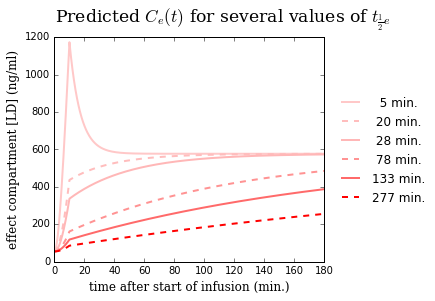

In [47]:
line_style = None
legendlist = []
plotlist = []
fig = plt.figure()
ax = fig.add_axes([0.12, 0.12, 0.625, 0.78])
# add_axes(*args, **kwargs)
# Add an axes at position rect [left, bottom, width, height], all #s in fractions of figure width and height
for thalfe in (thalfes):
    ke = ln2/thalfe
    minshade=0.2
    shade=(1-minshade)*(1-thalfe/277.)
    line_style = other_line_style(linestr=line_style)
    a, = ax.plot(times,Ce(times,ke), line_style, color=(1.,shade,shade),linewidth=2)
    plotlist.append(a)
    legendlist.append('{0:>3} min.'.format(thalfe))
plt.xlabel('time after start of infusion (min.)',family='serif', size='large')
plt.ylabel('effect compartment [LD] (ng/ml)',family='serif', size='large')
plt.title('Predicted $C_e(t)$ for several values of $t_{\\frac{1}{2}e}$', \
          family='serif', size='xx-large', position=(0.625,1.04))  # , verticalalignment='bottom'
plt.axis((0,180,0,1200))
fig.legend(plotlist, legendlist, loc='right', framealpha=0)   # , loc='right' , loc=(.77,0.35)
#frame=legend.getframe()
#frame.set_facecolor('green')
#plt.savefig(titlestring.png, dpi=600, transparent=True) 
#plt.savefig(titlestring+'.tiff', dpi=1200, transparent=True) 

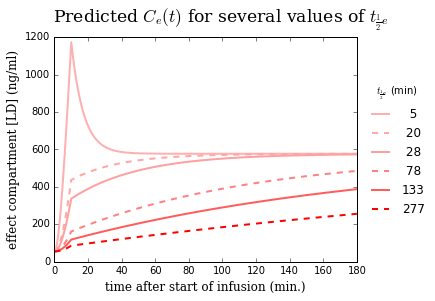

In [48]:
line_style = None
fig = plt.figure()
ax = fig.add_axes([0.12, 0.12, 0.70, 0.78])
# add_axes(*args, **kwargs)
# Add an axes at position rect [left, bottom, width, height], all #s in fractions of figure width and height
for thalfe in (thalfes):
    ke = ln2/thalfe
    minshade=0.3
    shade=(1-minshade)*(1-thalfe/277.)
    line_style = other_line_style(linestr=line_style)
    ax.plot(times,Ce(times,ke), line_style, color=(1.,shade,shade), linewidth=2 \
                 , label='{0:>3}'.format(thalfe) )
plt.xlabel('time after start of infusion (min.)',family='serif', size='large')
plt.ylabel('effect compartment [LD] (ng/ml)',family='serif', size='large')
plt.title('Predicted $C_e(t)$ for several values of $t_{\\frac{1}{2}e}$', \
          family='serif', size='xx-large', position=(0.55,1.04))  # , verticalalignment='bottom'
plt.axis((0,180,0,1200))
myhandles, mylabels = ax.get_legend_handles_labels()
fig.legend(myhandles, mylabels, loc='right', framealpha=0, title=thalfstring+' (min)') 
plt.savefig(titlestring+'.tiff', dpi=1200, transparent=True) 

## Moved .png and .tiff files to the 'hysteresis' subdirectory.

```
def Ce(time, ke):    # , ce0=55.4
    """Ce(t), (approximately) exact solution for concentration of LD in the effect compartment.
    
    # keyword argument: ce0 -- concentration in effect compartment at time t=0, Ce(0).
    t is a numpy array of time points
    k is the rate constant ke, a.k.a. ke0.  Units: t min, Ce(t) ng/ml, k 1/min.
    Assumes the Cp(t) modeled in hysteresis_5.ipynb based on Fig. 3 from Black et al 2003. 
    Ce(0)=the baseline Cp in the "practical off" state for 10 LD-treated PD patients in (ibid.).
    """
```
for varying ke, EC50, and n

In [49]:
def effect(time, ke, ec50, n=1):  # , ce0=55.4
    """E(Ce(t)), drug effect at time t, based on [drug] in effect compartment, using a sigmoid PD model.

    # keyword argument: ce0 -- concentration in effect compartment at time t=0, Ce(0).
    t is a numpy array of time points
    k is the rate constant ke, a.k.a. ke0.  Units: t min, Ce(t) ng/ml, k 1/min.
    n is the Hill constant.
    Assumes WLOG that E(0) = 0 and Emax = 1.
    Assumes the Cp(t) modeled in hysteresis_5.ipynb based on Fig. 3 from Black et al 2003. 
    Ce(0)=the baseline Cp in the "practical off" state for 10 LD-treated PD patients in (ibid.).
    """
    return Ce(time, ke)**n/(Ce(time, ke)**n+ec50**n)

In [51]:
print (times[:8])
print (times[-8:])

[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75]
[ 178.25  178.5   178.75  179.    179.25  179.5   179.75  180.  ]


In [52]:
print (Ce(times,ln2/20)[:8])
print (Ce(times,ln2/20)[-8:])

[ 55.4         55.70854664  56.62641398  58.14201863  60.24387712
  62.92060506  66.16091625  69.95362187]
[ 576.73320965  576.73675384  576.74026746  576.74375076  576.74720401
  576.75062747  576.7540214   576.75738605]


In [54]:
print( effect(times, ln2/60, 300)[:8])
print (effect(times, ln2/60, 300)[-8:])

[ 0.1558807   0.15612538  0.15685428  0.15805852  0.15972766  0.16184988
  0.16441203  0.1673998 ]
[ 0.63509109  0.63516151  0.63523169  0.63530165  0.63537138  0.63544088
  0.63551016  0.63557921]


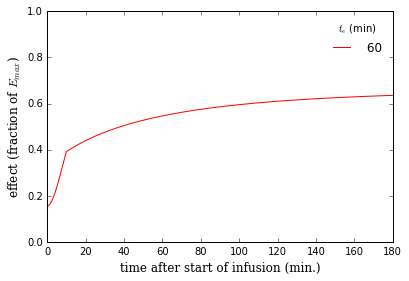

In [55]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.80, 0.8])
ax.plot(times,effect(times, ln2/60, 300), 'r', label='{0:>3}'.format(60) )
plt.xlabel('time after start of infusion (min.)',family='serif', size='large')
plt.ylabel('effect (fraction of $E_{max}$)',family='serif', size='large')
plt.axis((0,180,0,1))
# myhandles, mylabels = ax.get_legend_handles_labels()
#fig.legend(myhandles, mylabels, loc='right', framealpha=0, title=thalfstring+' (min)') 
plt.legend(loc='best', framealpha=0, title=' $t_e$ (min)' ) # , title=thalfstring+' (min)'
#plt.savefig(titlestring+'.tiff', dpi=1200, transparent=True) 
plt.show()

```python
plt.close('all')
%run hysteresis_plotting_03.py
```

In [56]:
pwd

'C:\\Users\\kevin\\Documents\\Jupyter_nbs\\hysteresis'

In [57]:
# # See hysteresis_plotting_04.py 

# ### Definitions: time axis
time_step = 0.25
start_time = 0.0
duration = 90.0     # 180.0, 480.0
times = np.arange(start_time, duration+time_step, time_step)
def Cp(time):  
    """Cp(t), empirically defined to approximate Fig. 3 in Black et al 2003 (t in min, Cp in ng/ml).

    Compare Fig. 3 in Black et al 2003 and effect_compartment_modeling_20141025.xlsx
    See hysteresis_5.ipynb.
    """
    import numpy as np  # for exp(x)
    return np.where(time<=tload, 55.4 - 5.86707071*time**2 + 286.69070707*time, \
      26689.8016179421*np.exp(-0.349642935*time) + 1490.70335112923*np.exp(-0.0450951082*time) + 577.144039)    
def Ce(time, ke):
    """Ce(t), (approximately) exact solution for concentration of LD in the effect compartment.
    
    t is a numpy array of time points
    k is the rate constant ke, a.k.a. ke0.  Units: t min, Ce(t) ng/ml, k 1/min.
    Assumes the Cp(t) modeled in hysteresis_5.ipynb based on Fig. 3 from Black et al 2003. 
    Ce(0)=the baseline Cp in the "practical off" state for 10 LD-treated PD patients in (ibid.).
    """
    a0 = 55.4 # baseline Cp in the "practical off" state for 10 LD-treated PD pts, Black et al 2003
    ce0 = a0  # Ce(0) is assumed to be the baseline Cp(0)
    # The next couple of lines could be dealt with more gracefully, I suppose.
    # assert ke != alpha, "If k==alpha, Ce(t) may need a modified form."
    # assert ke != beta,  "If k==beta,  Ce(t) may need a modified form."
    if float(ke)==0.0:  # If k is zero, Ce(t)==Ce(0) for all t>=0.
        return np.full(time.shape,ce0,dtype=float)
    # See hysteresis_6.ipynb and higher for floats below.
    ce1constant = ce0 - 286.69070707/ke - 11.73414142/ke**2  # for convenience in ce1(t) below
    return np.where(time<0.0,np.full(time.shape,ce0),\
        np.where(time<=tload, (ce0-ce1constant)*np.exp(-ke*time) \
            -5.86707071*time**2 + (286.69070707 + 11.73414142/ke)*time + ce1constant , \
        577.144039 + np.exp(-ke*(time-10))*(1758.4559607-169.349292870/ke-11.73414142/ke**2) \
            + (ce0-ce1constant)*np.exp(-ke*time)) )
def effect(time, ke, ec50, n=1):
    """E(Ce(t)), drug effect at time t, based on [drug] in effect compartment, using a sigmoid PD model.

    time is a numpy array of time points
    ke is the rate constant ke, a.k.a. ke0.  Units: t min, Ce(t) ng/ml, ke 1/min.
    n is the Hill constant.
    Assumes that E(0) = 0 and Emax = 1 = 100%.
    """
    return Ce(time, ke)**n/(Ce(time, ke)**n+ec50**n)
# print times[-9:]
# print Cp(times)[-9:]
# print '\ndata for HY2:\n'
# print effect(times, 0.008886502, 290, n=5)[-9:]


best_maint_90min_2plot2.png.png uses the following parameters:
ke0 = 0.002502/min, t_half_effect = 277.00 min, ec50 = 100.0 ng/ml, nHill = 1.00

HY1_maint_90min_2plot2.png.png uses the following parameters:
ke0 = 0.005212/min, t_half_effect = 133.00 min, ec50 = 200.0 ng/ml, nHill = 2.00

HY2_maint_90min_2plot2.png.png uses the following parameters:
ke0 = 0.008887/min, t_half_effect = 78.00 min, ec50 = 290.0 ng/ml, nHill = 5.00

HY3_maint_90min_2plot2.png.png uses the following parameters:
ke0 = 0.024755/min, t_half_effect = 28.00 min, ec50 = 600.0 ng/ml, nHill = 7.00

HY4_maint_90min_2plot2.png.png uses the following parameters:
ke0 = 0.034657/min, t_half_effect = 20.00 min, ec50 = 940.0 ng/ml, nHill = 18.00

worst_maint_90min_2plot2.png.png uses the following parameters:
ke0 = 0.138629/min, t_half_effect = 5.00 min, ec50 = 1200.0 ng/ml, nHill = 49.00

best_no_90min_2plot2.png.png uses the following parameters:
ke0 = 0.002502/min, t_half_effect = 277.00 min, ec50 = 100.0 ng/ml, nHill 

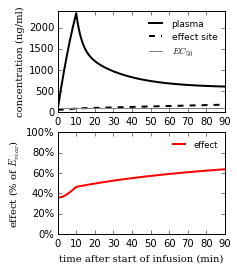

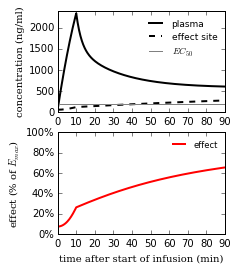

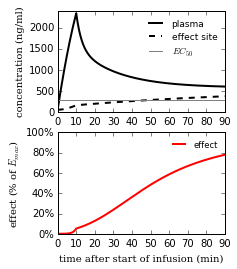

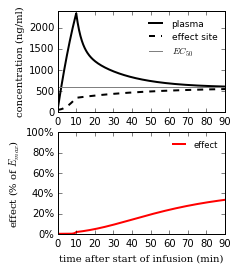

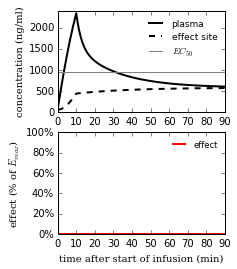

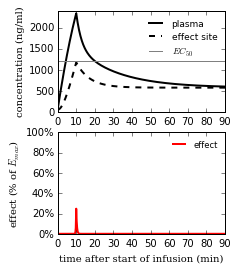

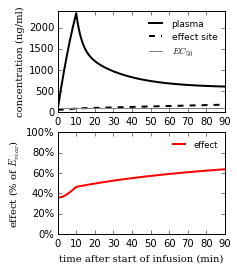

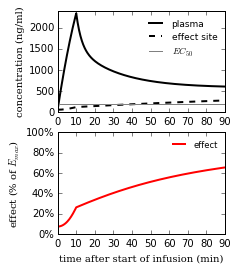

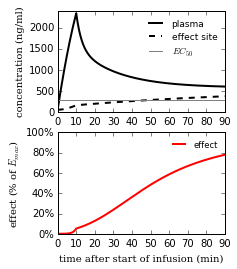

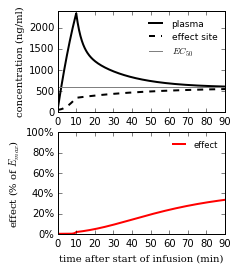

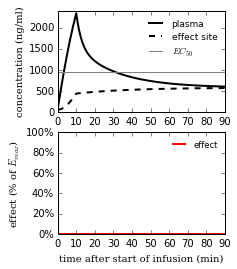

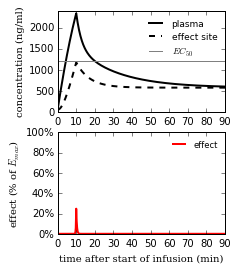

In [377]:
plt.close('all')
%run hysteresis_plotting_04.py

In [59]:
print (ec50, ke, n)

NameError: name 'ec50' is not defined

In [406]:
tempeffect=Ce(times, ke)**1/(Ce(times, ke)**1+ec50**1)
temp=np.hstack((times.reshape((times.size,1)),tempeffect.reshape((tempeffect.size,1))))
print temp.shape
# print tempeffect.T

(361L, 2L)


In [411]:
print temp[:5]
print
print temp[-5:]

[[ 0.          0.04412936]
 [ 0.25        0.04416477]
 [ 0.5         0.04427045]
 [ 0.75        0.04444553]
 [ 1.          0.04468912]]

[[ 89.           0.18559188]
 [ 89.25         0.18581038]
 [ 89.5          0.18602847]
 [ 89.75         0.18624616]
 [ 90.           0.18646345]]


In [409]:
times.shape

(361L,)

In [438]:
figure = plt.figure(figsize=(3,4)) 
titlestring = 'Predicted $C_p(t)$, $C_e(t)$ and $E(C_e(t))$, $t_{\\frac{1}{2}e} =$'\
    +' {:.0f} min.'.format(23.1)
figure.suptitle(titlestring, family='serif', size='small', verticalalignment='top')
plt.savefig('temp', dpi=300, transparent=True) 

KeyError: '\\frac{1}{2}e'

In [425]:
pwd

u'C:\\Users\\kevin\\Documents\\IPython_notebooks'

In [3]:
%cd 'C:\Users\kevin\Documents\IPython_notebooks'
import matplotlib.pyplot as plt
import numpy as np
plt.close('all')
%run hysteresis_plotting_04.py

ERROR:root:File `'hysteresis_plotting_04.py'` not found.


[WinError 123] The filename, directory name, or volume label syntax is incorrect: "'C:\\Users\\kevin\\Documents\\IPython_notebooks'"
C:\Users\kevin\Documents\SourceTree\hysteresis



best_maint_90min_2plot2.png uses the following parameters:
ke0 = 0.002502/min, t_half_effect = 277.00 min, ec50 = 100.0 ng/ml, nHill = 1.00

HY1_maint_90min_2plot2.png uses the following parameters:
ke0 = 0.005212/min, t_half_effect = 133.00 min, ec50 = 200.0 ng/ml, nHill = 2.00

HY2_maint_90min_2plot2.png uses the following parameters:
ke0 = 0.008887/min, t_half_effect = 78.00 min, ec50 = 290.0 ng/ml, nHill = 5.00

HY3_maint_90min_2plot2.png uses the following parameters:
ke0 = 0.024755/min, t_half_effect = 28.00 min, ec50 = 600.0 ng/ml, nHill = 7.00

HY4_maint_90min_2plot2.png uses the following parameters:
ke0 = 0.034657/min, t_half_effect = 20.00 min, ec50 = 940.0 ng/ml, nHill = 18.00

worst_maint_90min_2plot2.png uses the following parameters:
ke0 = 0.138629/min, t_half_effect = 5.00 min, ec50 = 1200.0 ng/ml, nHill = 49.00

best_no_90min_2plot2.png uses the following parameters:
ke0 = 0.002502/min, t_half_effect = 277.00 min, ec50 = 100.0 ng/ml, nHill = 1.00

HY1_no_90min_2plot2.

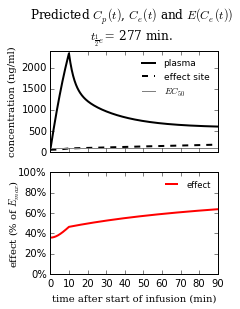

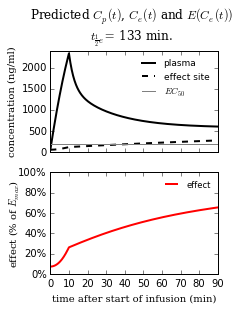

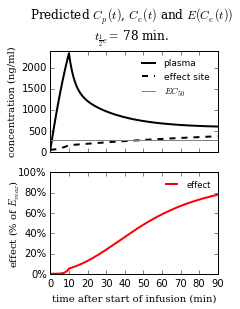

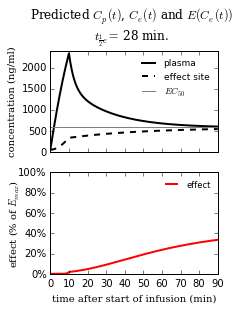

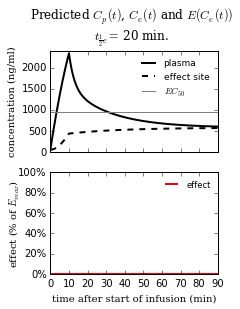

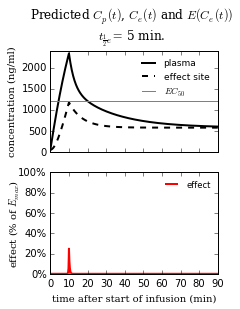

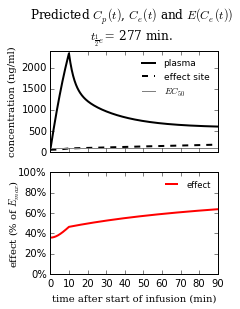

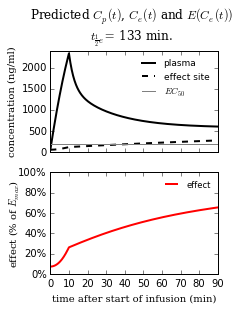

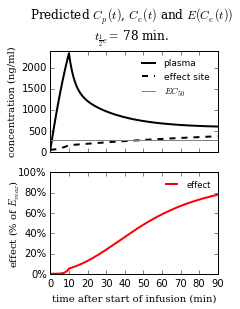

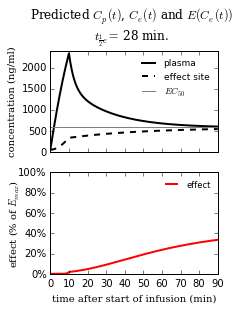

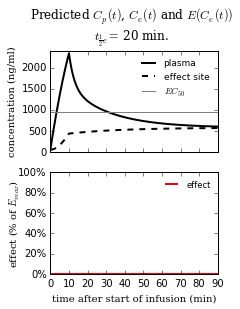

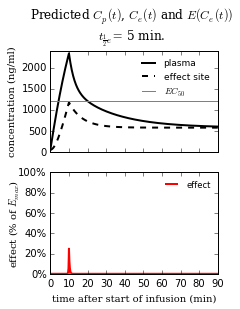

In [447]:
plt.close('all')
%run hysteresis_plotting_04.py

In [450]:
for x in (0.002502336, 0.005211633, 0.008886502, 0.024755256, 0.034657359, 0.138629436):
    print ln2/x

277.000043383
132.999998381
78.0000027637
28.0000005074
20.0000000162
5.00000000404



worst_maint_90min_2plot2a.png uses the following parameters:
ke0 = 0.138629/min, t_half_effect = 5.00 min, ec50 = 1200.0 ng/ml, nHill = 49.00

tload = 10.0; Ce(tload) = 1173.1; ec50 = 1200; E(Ce(tload)) = 0.248


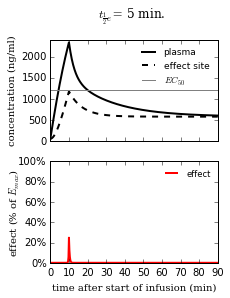

In [478]:
plt.close('all')
%run hysteresis_plotting_04.py

In [467]:
print 1173.0794388879071**49/(1173.0794388879071**49+1200**49)
print 1/(1+1/(1173.0794388879071/1200)**49)

0.247540296458
0.247540296458


# Aargh. Need a higher peak Cp to see the big changes from before.
What if I just assume Cp(t) is multiplied by a constant? That should scale Ce(t) similarly.

If life is fair.

In [488]:
# Assumes the following constants:
a0 = 55.4  #  Actually, use the symbol "ce0" rather than assuming a specific value for a0.
a1 = 286.69070707
a2 = 5.86707071
tload = 10
Cinf = 577.144039
B = 949.610835
alpha = 0.349642935
beta = 4.50951082e-02
scale = 1.25
#cp1=Function('cp1')  # Conc. plasma early
#ce1=Function('ce1')  # Conc. effect compartment early
#cp2=Function('cp2')  # late
#ce2=Function('ce2')  # late
#cpeak=Symbol('cpeak')
#ce1peak=Symbol('ce1peak')

In [481]:
type(scale)


float

In [482]:
cp1

ce0 - 5.86707071*t**2 + 286.69070707*t

In [483]:
ce1

-5.86707071*t**2 + t*(286.69070707 + 11.73414142/k) + (ce0 - 55.4 + 286.69070707/k + 11.73414142/k**2)*exp(-k*t) + 55.4 - 286.69070707/k - 11.73414142/k**2

In [484]:
cp2

32.9974191225346*(ce0 + 753.445125699999)*exp(-0.349642935*t) + 1490.70335112923*exp(-0.0450951082*t) + 577.144039

In [485]:
ce2

(286.69070707/k + 11.73414142/k**2)*exp(-k*t) + (1758.4559607 - 169.34929287/k - 11.73414142/k**2)*exp(-k*(t - 10)) + 577.144039

In [489]:
ce1 = scale*ce1

In [490]:
ce1

-7.3338383875*t**2 + 1.25*t*(286.69070707 + 11.73414142/k) + 1.25*(ce0 - 55.4 + 286.69070707/k + 11.73414142/k**2)*exp(-k*t) + 69.25 - 358.3633838375/k - 14.667676775/k**2

In [491]:
ce1 = ce1/scale
ce1

-5.86707071*t**2 + 1.0*t*(286.69070707 + 11.73414142/k) + 1.0*(ce0 - 55.4 + 286.69070707/k + 11.73414142/k**2)*exp(-k*t) + 55.4 - 286.69070707/k - 11.73414142/k**2

In [2]:
55.4 - 5.86707071*10**2 + 286.69070707*10

2335.5999996999994

In [6]:
import math
def temp_late(t):
    return 26689.8016179421*math.exp(-0.349642935*t) + 1490.70335112923*math.exp(-0.0450951082*t) + 577.144039

In [19]:
print("min\tC(p)\t%>Css")
print("===\t====\t=====")
for time in range(10,120,10):
    print("{0:3d}\t{1:4.0f}\t{2:5.0f}".format(time,temp_late(time),100*(temp_late(time)/600-1)))

min	C(p)	%>Css
===	====	=====
 10	2336	  289
 20	1207	  101
 30	 963	   61
 40	 823	   37
 50	 734	   22
 60	 677	   13
 70	 641	    7
 80	 618	    3
 90	 603	    0
100	 594	   -1
110	 588	   -2
